## PyTorch Computer Vision

 - See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

- See reference article - https://www.learnpytorch.io/03_pytorch_computer_vision/

## Computer vision libraries in PyTorch


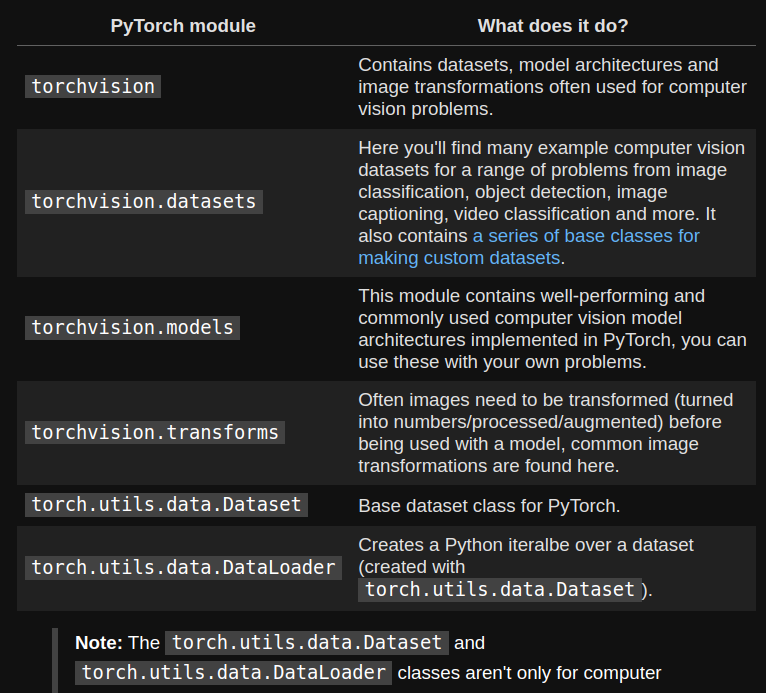

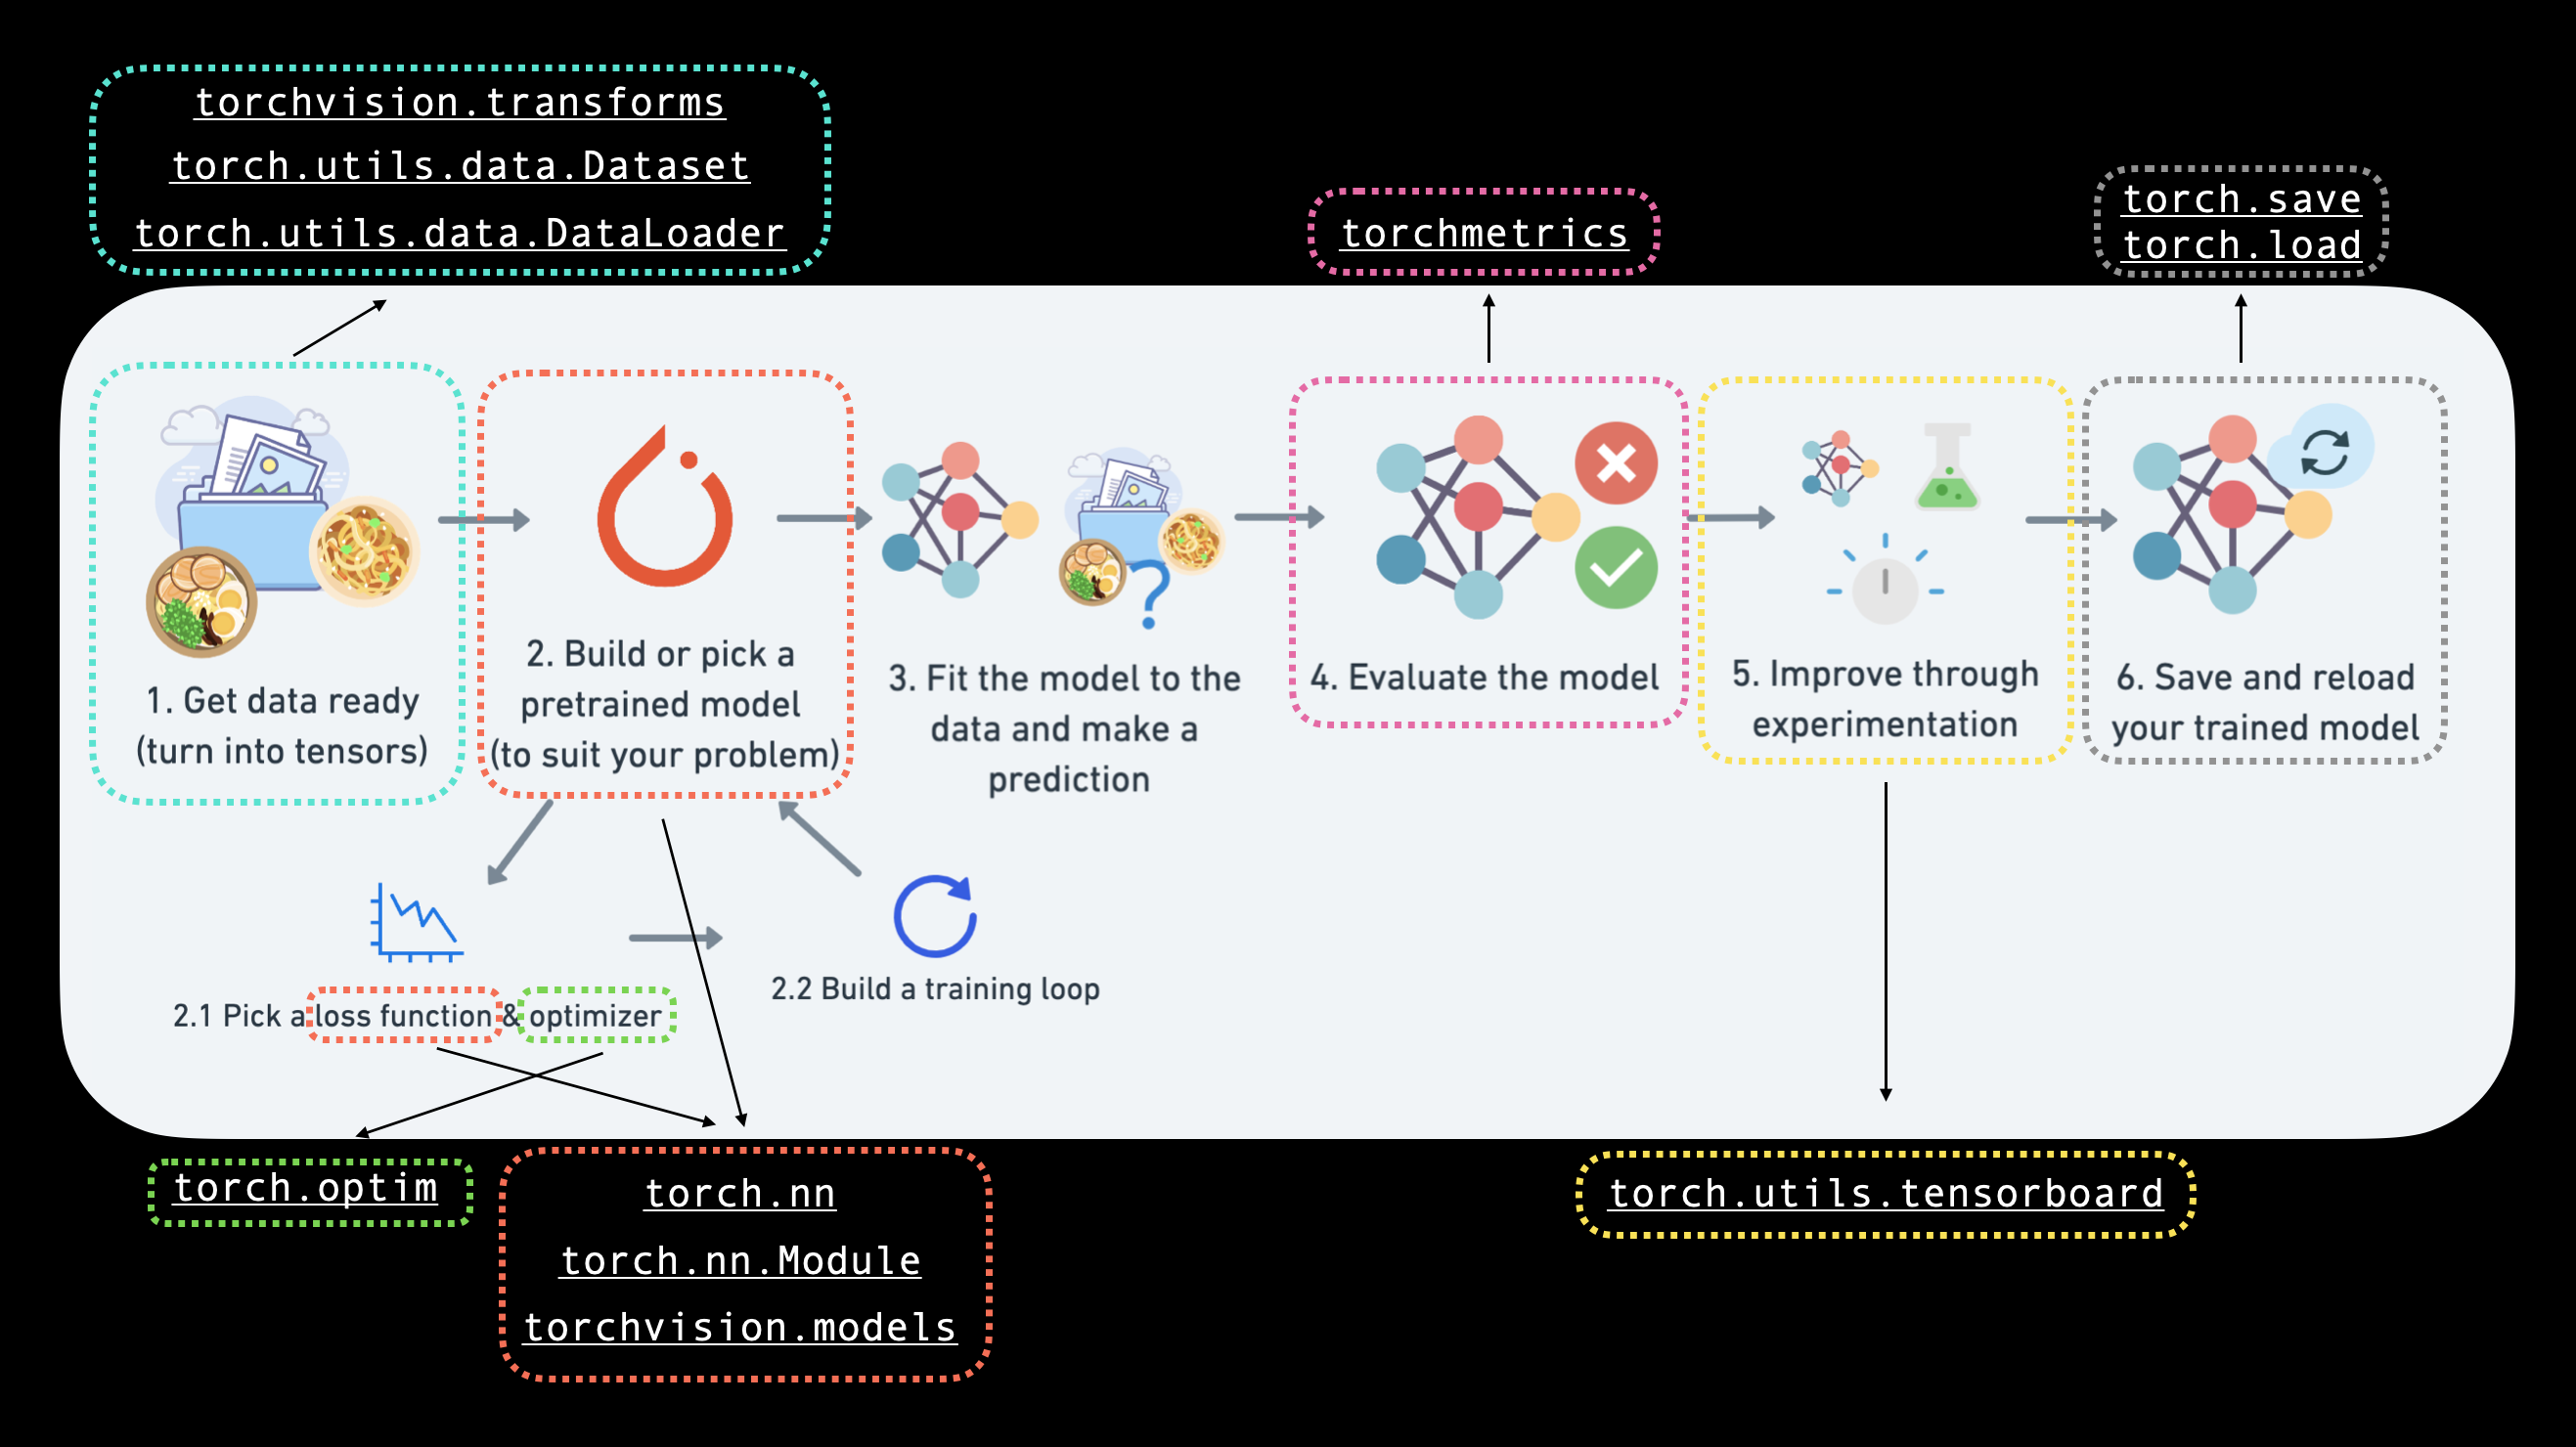

In [ ]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118


## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with `FashionMNIST`.

MNIST stands for Modified National Institute of Standards and Technology.

The original MNIST dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

FashionMNIST, made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download the data?
    train = True, # do we want the training (for train purpose) dataset?
    download = True, # do we want to download yes/no?
    transform= ToTensor(), # how do we want to transform data
    target_transform= None # for transforming the labels
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train = False, # For test purpose, thus false
    download = True,
    transform= ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8425621.97it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 139087.09it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2661990.55it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25195189.02it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### What does `ToTensor()` does

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In the other cases, tensors are returned without scaling.



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## 1.1 Check input and output shapes of data

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

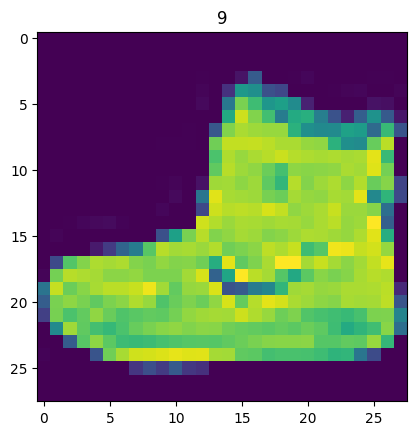

In [ ]:
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

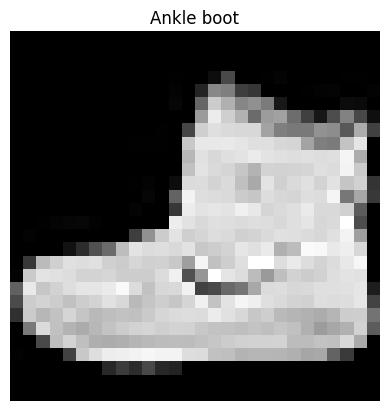

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

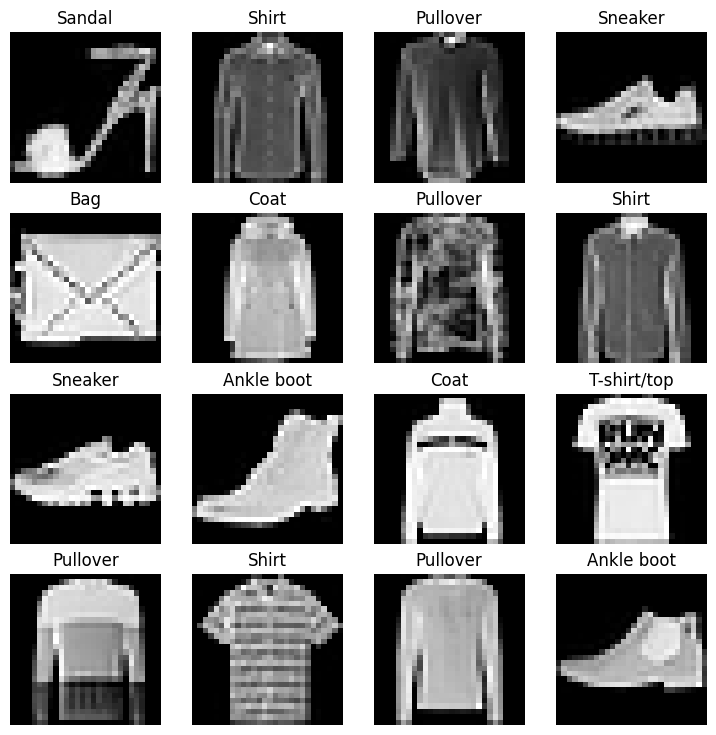

In [ ]:
# PLot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

train_data,

## 2. Prepare Dataloader

Right now our data is in the form of PyTorch Datasets.

Dataloader turns our data into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

 __1.__ It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images or any other number at a time.

 __2.__ It gives ou rneural network more chances to update its gradients per epoch.

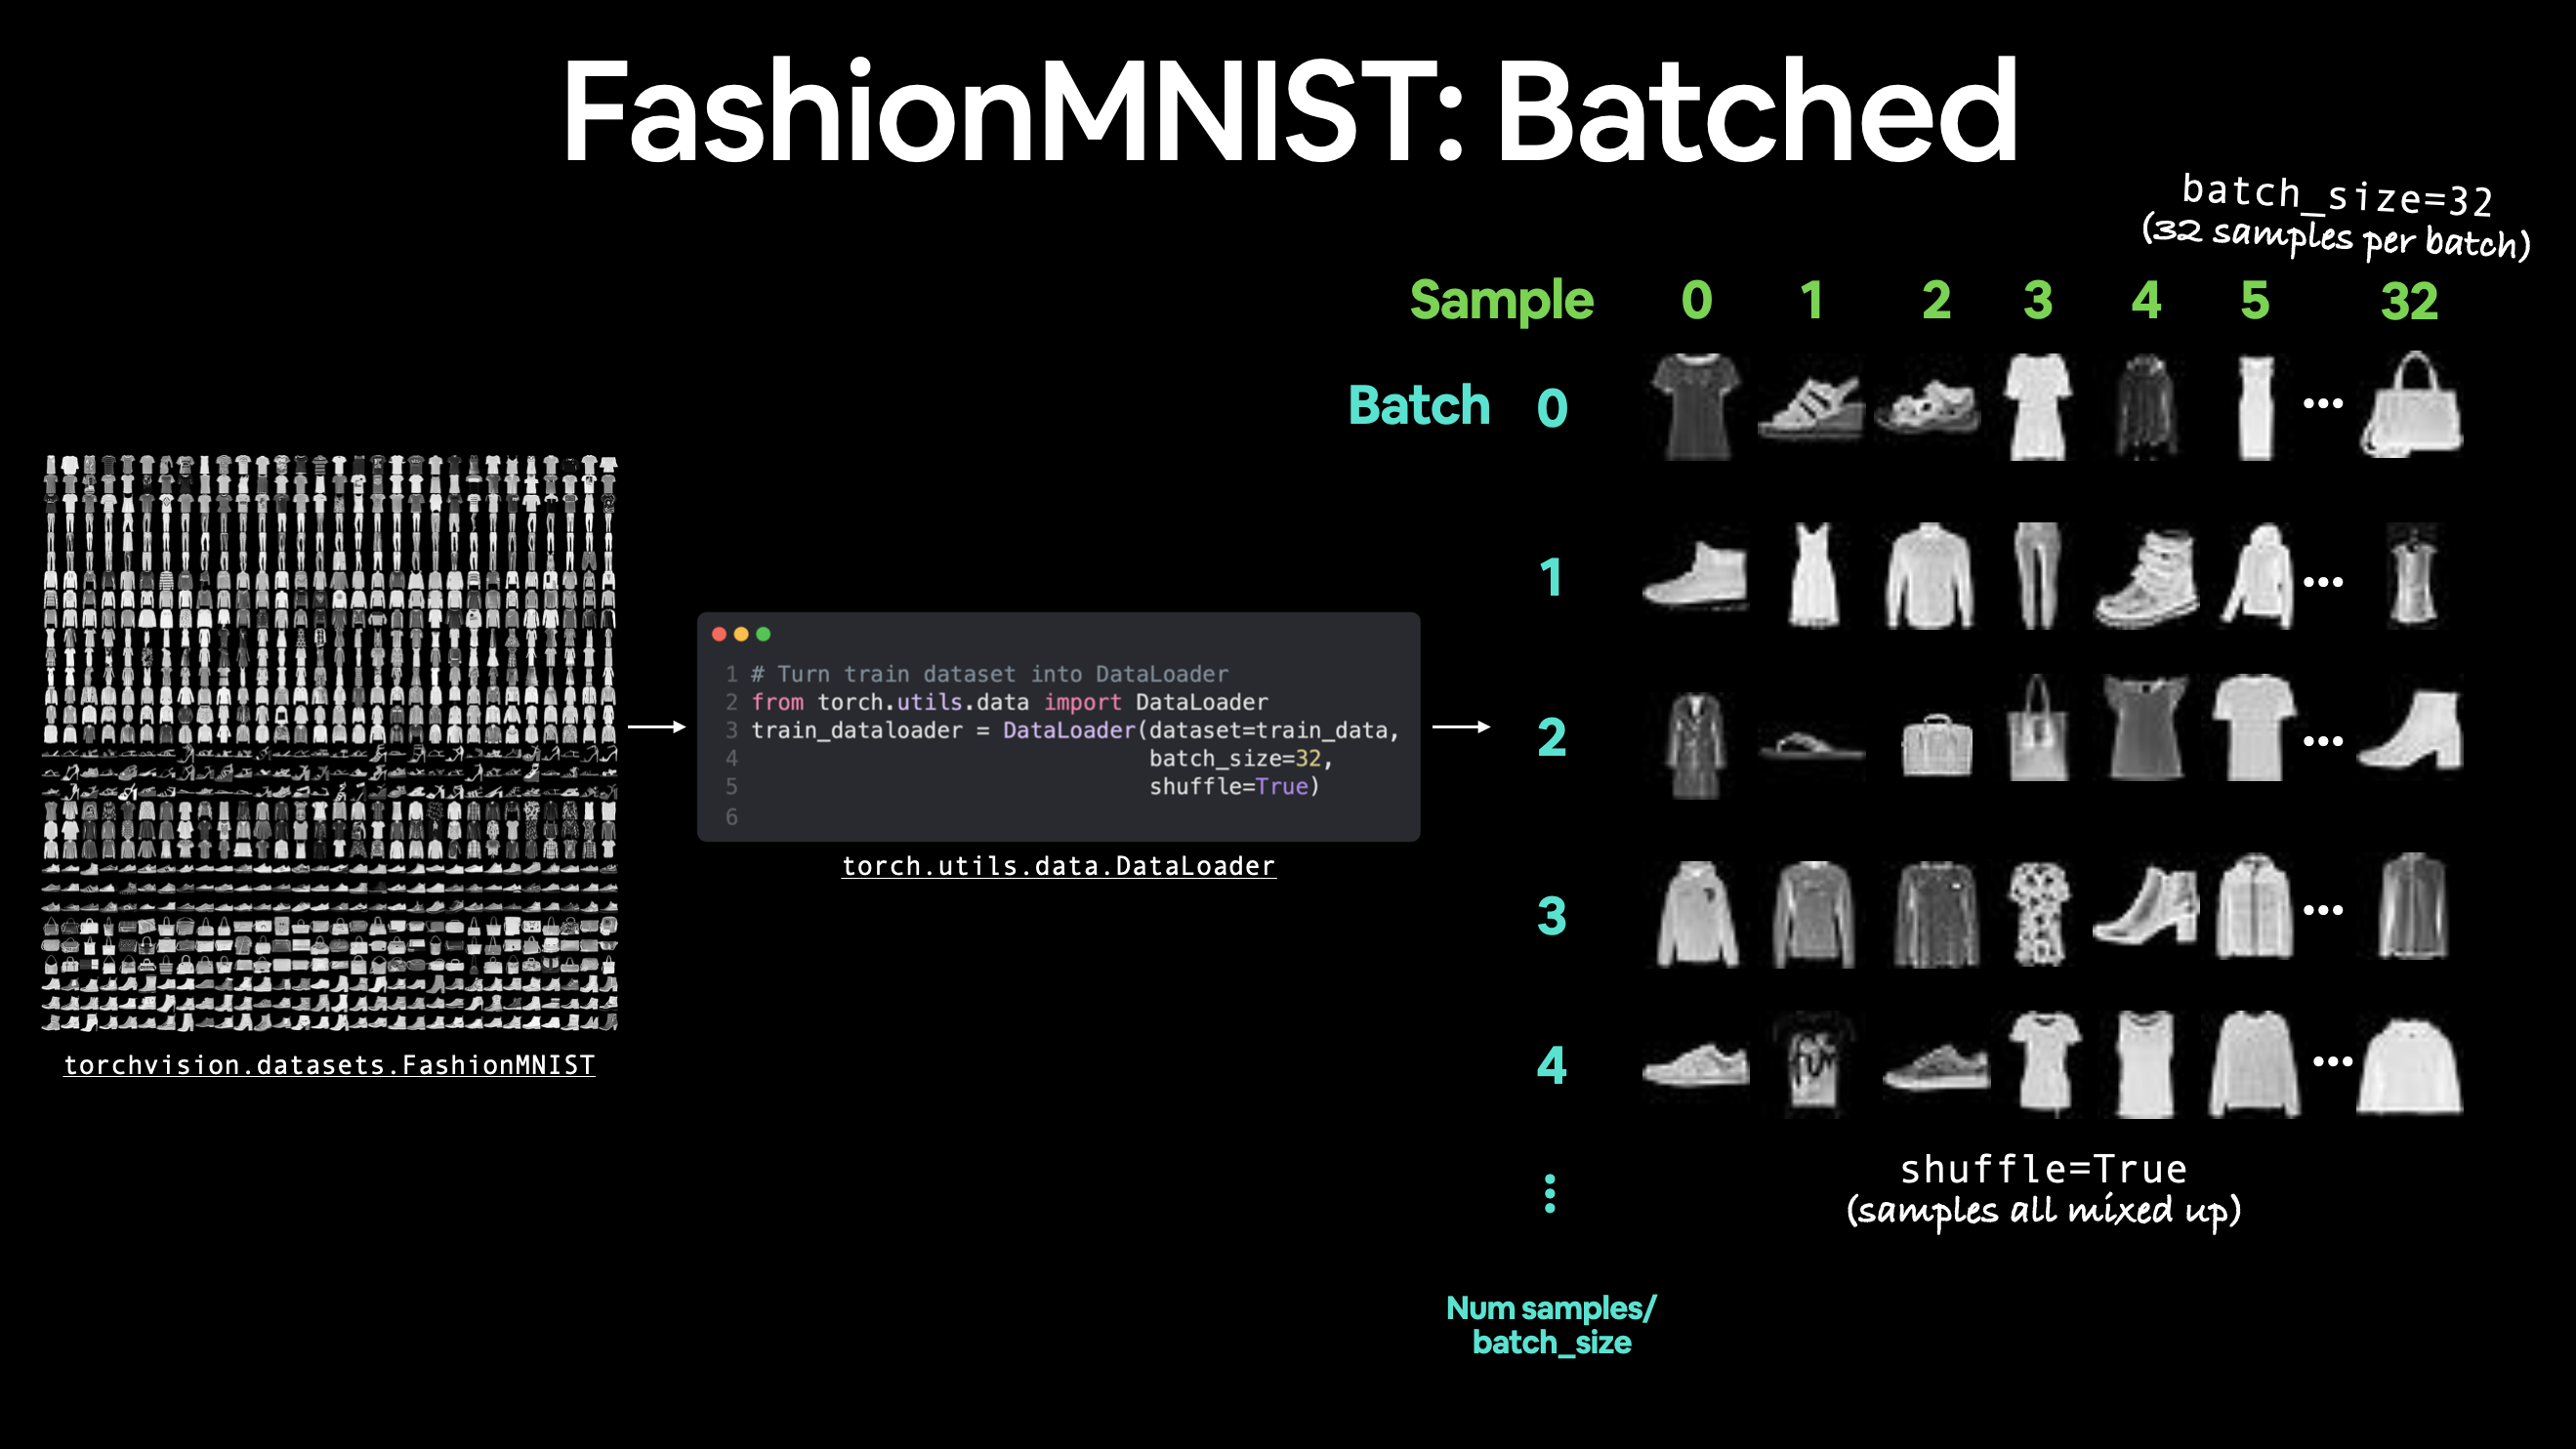

In [ ]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparamater
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5ba0ce66b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5ba0ec3c70>)

In [ ]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_datalaoder: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_datalaoder: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f5ba0ce66b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f5ba0ec3c70>)
Length of train_datalaoder: 1875 batches of 32
Length of test_datalaoder: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

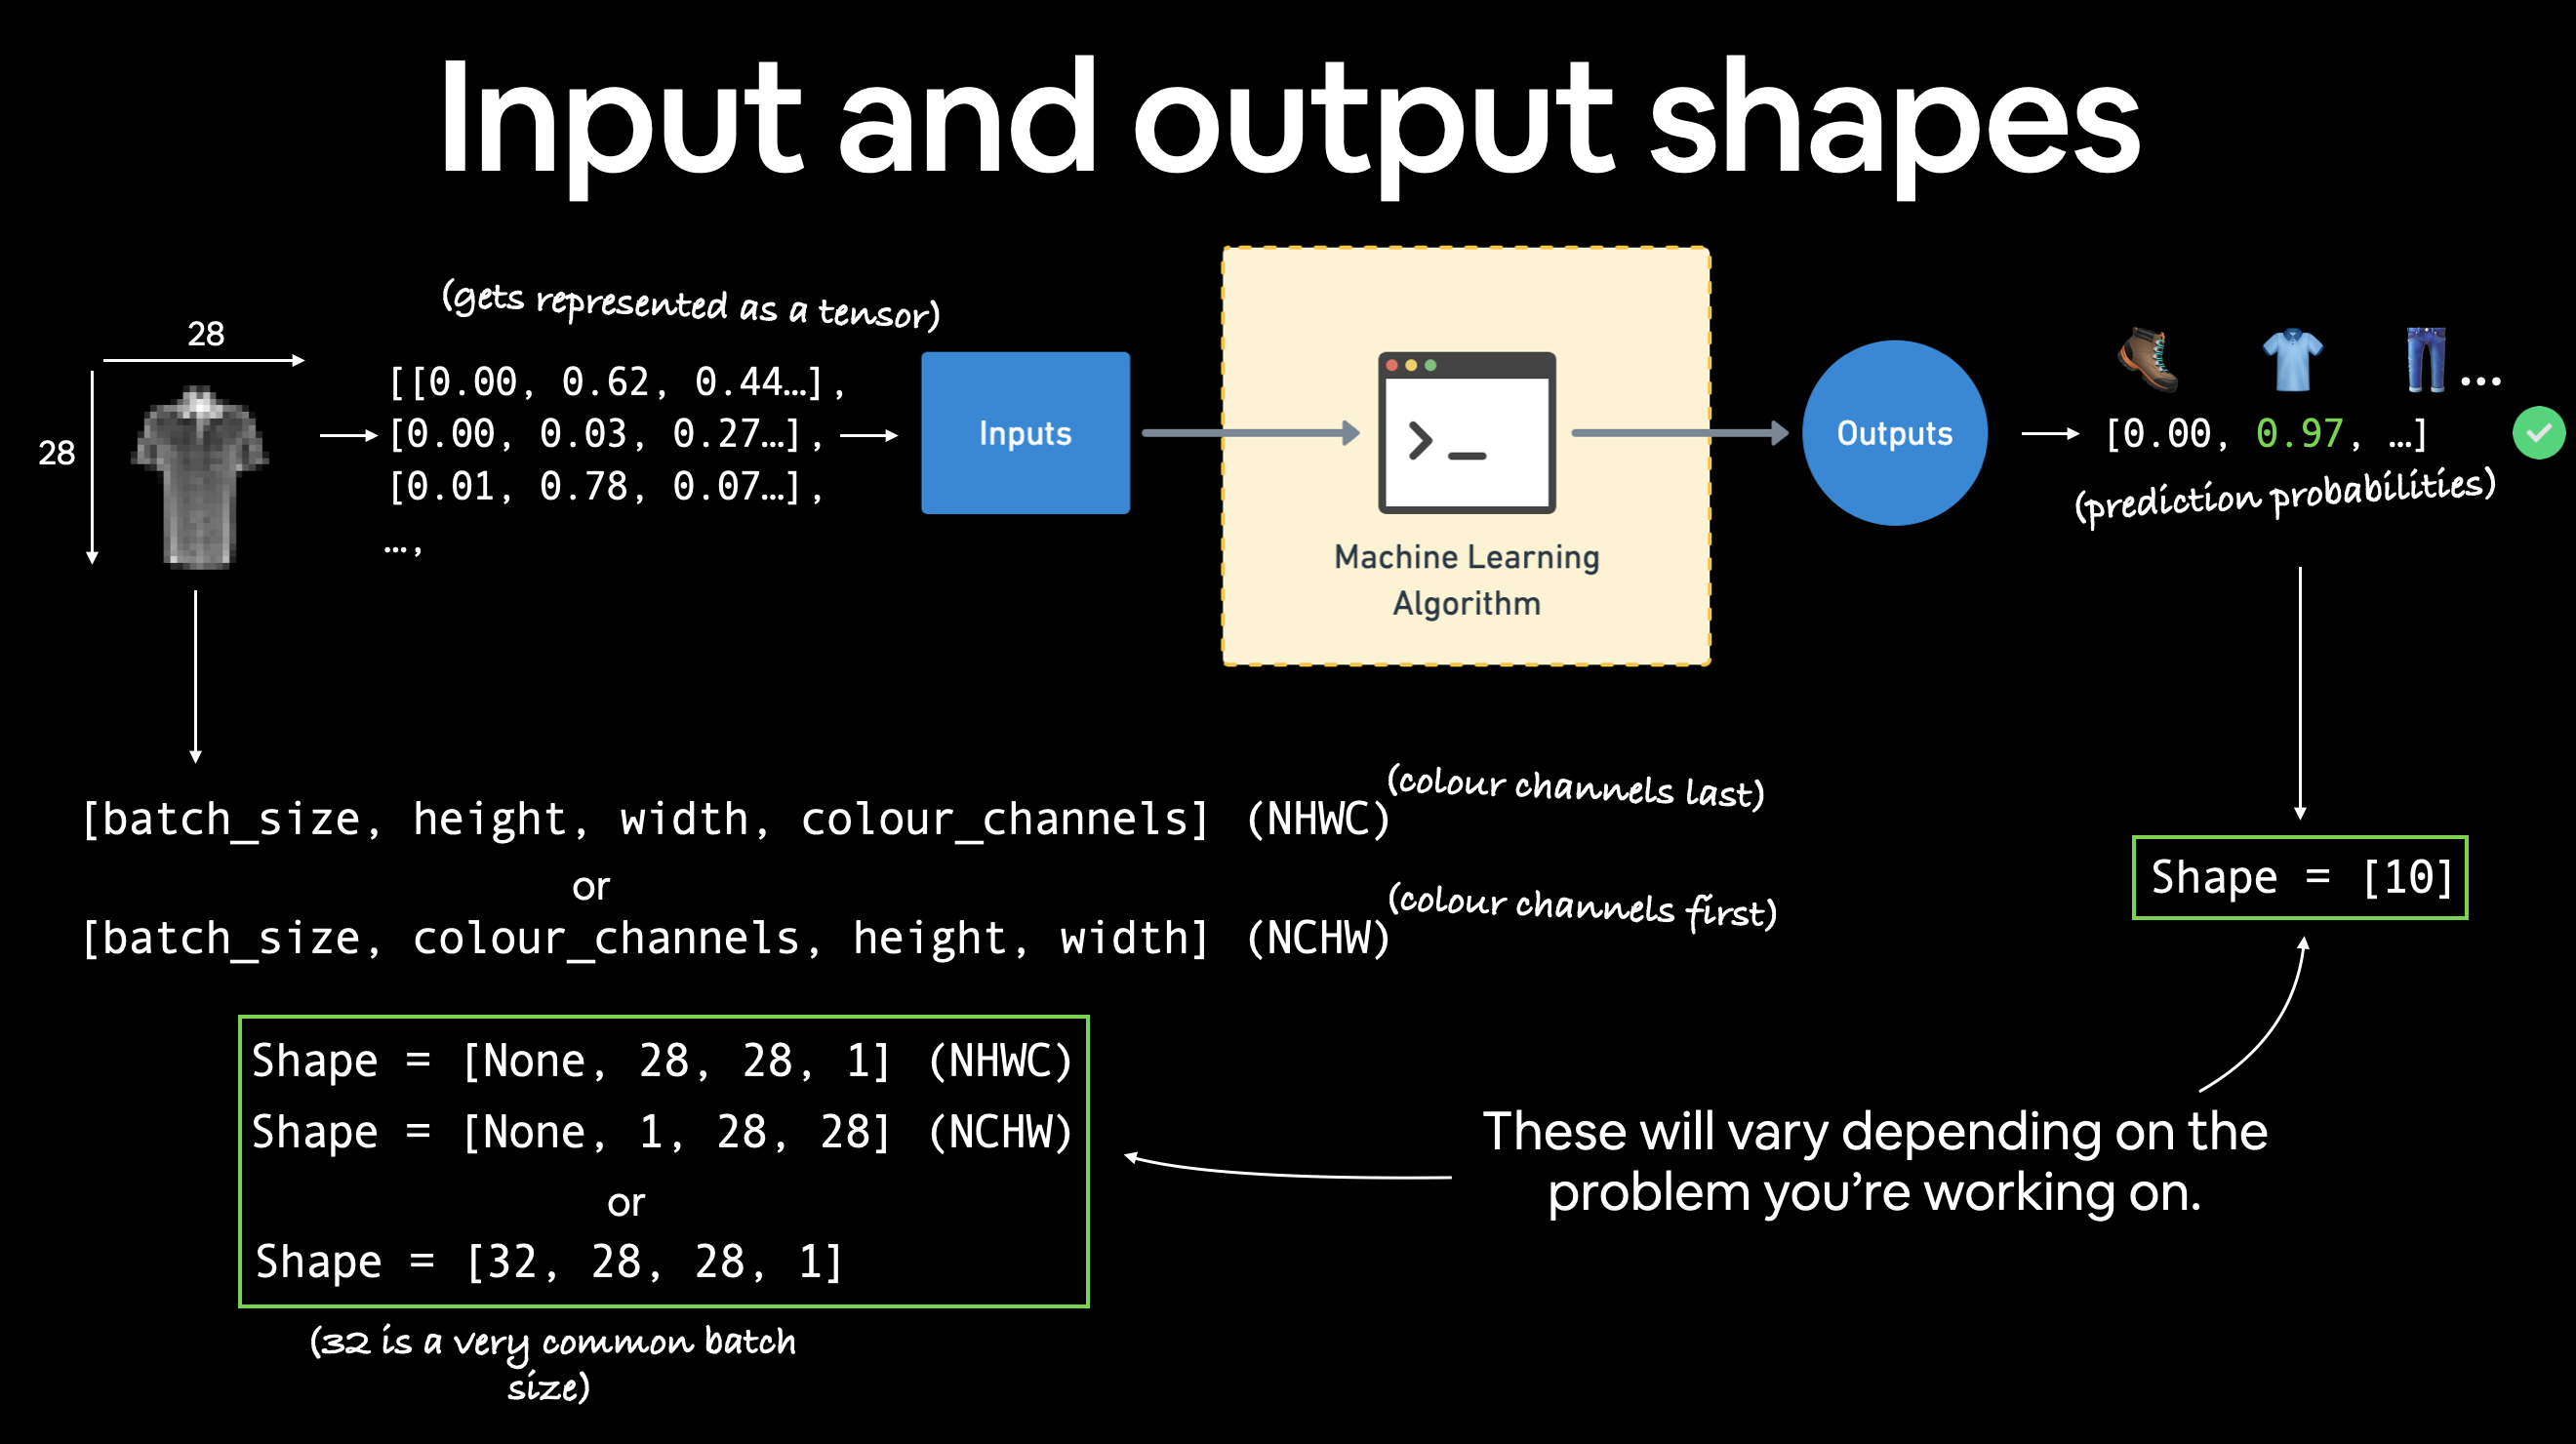

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


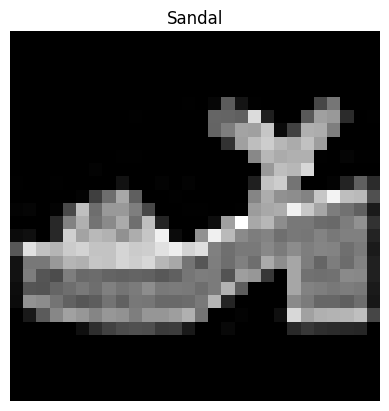

In [ ]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A `baseline` model is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

In [ ]:
# Creating a Flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(x.shape)

# Flatten our sample
output = flatten_model(x) # perform forward pass
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


`Flatten()` converts all dimensions into a single vector.

Flattens a contiguous range of dims into a tensor. For use with `Sequential`.

In [ ]:
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup model with input paramaters
model_0 = FashionMNISTmodelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
    ).to('cpu')


model_0



FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
  # dummy_x = torch.rand([1, 1, 28, 28] )
  # model_0(dummy_x)

### 3.1 Setup loss, optimizer and evaluation metrics

 - __Loss function__ - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
 - __Optimizer__ - out optimizer `torch.optim.SGD()`, for stochastic gradient descent.
 - __Evaluation metric__ - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the `timeit.default_timer()` function from the Python `timeit` module.

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device_name: torch.device = None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device_name}: {total_time: .3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code ....
end_time = timer()
print_train_time(start_time, end_time, device_name="cpu")

Train time on cpu:  0.000 seconds


4.215700002418998e-05

### 3.3 Creating a training loop and training a model on batches of data

Let's step through it:

 1. Loop through epochs.
 2. Loop through training batches, perform training steps, calculate the train loss per batch.
 3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
 4. Print out what's happening.
 5. Time it all (for fun).
A fair few steps but...

...if in doubt, code it out.

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  #### Training


  train_loss=0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader): # (X, y) is features and label
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step() # paramters are updated per batch not per epoch

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at: {batch * len(X)} / {len(train_dataloader.dataset)} samples")


  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulativley)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the acc average per batch
    test_acc /= len(test_dataloader)


  # Print out what's happening
  print(f"\nTrain loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")

# Calcuate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device_name="cpu") # or we can write next(model_0.parameters().device()) to get device type


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at: 0 / 60000 samples
Looked at: 12800 / 60000 samples
Looked at: 25600 / 60000 samples
Looked at: 38400 / 60000 samples
Looked at: 51200 / 60000 samples

Train loss:  0.5904 | Test loss:  0.5095, Test acc:  82.0387
Epoch: 1
------
Looked at: 0 / 60000 samples
Looked at: 12800 / 60000 samples
Looked at: 25600 / 60000 samples
Looked at: 38400 / 60000 samples
Looked at: 51200 / 60000 samples

Train loss:  0.4763 | Test loss:  0.4799, Test acc:  83.1969
Epoch: 2
------
Looked at: 0 / 60000 samples
Looked at: 12800 / 60000 samples
Looked at: 25600 / 60000 samples
Looked at: 38400 / 60000 samples
Looked at: 51200 / 60000 samples

Train loss:  0.4550 | Test loss:  0.4766, Test acc:  83.4265
Train time on cpu:  32.555 seconds


## 4. Make predictions and get Model_0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

            # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate the model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there in one)

In [ ]:
!nvidia-smi

Sat Jul  1 10:53:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# setup deivce agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions `(nn.ReLU())` in between each linear layer.

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTmodelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

#### __Why creating instance of a model is important__

Here are a few reasons why creating an instance of a model is important:

 - Model Architecture: The instance of the model defines the structure and connections of the neural network layers. You can specify the number of layers, the types of layers (e.g., convolutional, recurrent, fully connected), their sizes, and the activation functions used. By creating an instance, you can customize and define the specific architecture of your model according to your task requirements.

 - Parameter Initialization: The instance of the model holds the learnable parameters, such as weights and biases, that are optimized during the training process. By creating an instance, you can initialize these parameters with appropriate values or use pre-trained weights to accelerate the convergence of the model during training.

 - Forward Propagation: The instance of the model defines the forward propagation function that computes the output of the model given an input. This function describes how the data flows through the layers of the model and produces the desired predictions. By creating an instance, you can define the forward function, allowing you to pass inputs through the model and obtain the corresponding outputs.

 - Model Optimization: When training a neural network, you need to update the model parameters based on the loss calculated during the backward propagation (gradient descent) step. The instance of the model is required to access and update these parameters. By creating an instance, you can easily access the model's parameters and apply optimization algorithms, such as stochastic gradient descent (SGD), to update them iteratively.



In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTmodelV1(784, 10, len(class_names)).to(device)

In [ ]:
model_1

FashionMNISTmodelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
model_1.parameters()

<generator object Module.parameters at 0x7f5ba0b17920>

In [ ]:
next(iter(model_1.parameters()))

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
# Import the accuracy metric from helper_function
from helper_functions import accuracy_fn

# Setup a loss function and optimizer
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),
                              lr=0.01)

### 6.2 Functionizing training and evaluation/testing loop

In [ ]:
def training_step(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device = device):
  """
  Performs a training on model with learning on data loader
  """
  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):
    # Send data to GPU
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss
      train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Calculate the loss and accuracy per epoch and print what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}")

In [ ]:
def testing_step(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,
                 device: torch.device = device):



  """
  Performs testing on model with learning on data loader
  """
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval() # put the model in eval mode
  # Turn on inference context manager
  with torch.inference_mode():
      for X, y in data_loader:
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred = model(X)

          # 2. Calculate the loss and accuracy
          test_loss += loss_fn(test_pred, y)
          test_acc += accuracy_fn(y_true=y,
                                  y_pred=y_pred.argmax(dim=1))


      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}")

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way for each epoch we're going a training and a testing step.



In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start timer
train_time_start_on_gpu = timer()


# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    training_step(model=model_1,
                  data_loader=train_dataloader,
                  loss_fn=loss_fn_1,
                  optimizer=optimizer_1,
                  accuracy_fn=accuracy_fn,
                  device=device
                  )

    # testing_step(model=model_1,
    #              data_loader=test_dataloader,
    #              loss_fn=loss_fn,
    #              accuracy_fn=accuracy_fn,
    #              device=device)




train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device_name=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.42962 | Train accuracy: 53.81667
Epoch: 1
------
Train loss: 1.03328 | Train accuracy: 64.53667
Epoch: 2
------
Train loss: 0.96014 | Train accuracy: 66.05000
Train time on cuda:  33.022 seconds


In [ ]:
# torch.manual_seed(42)

# # Note: This will give error due to `eval_model()` not using device agnostic code
# model_1_results = eval_model(model=model_1,
#     data_loader=test_dataloader,
#     loss_fn=loss_fn,
#     accuracy_fn=accuracy_fn)
# model_1_results

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTmodelV1',
 'model_loss': 0.9737110733985901,
 'model_acc': 65.0758785942492}

### 7. Model 2: Building a Convolutional Neural Network (CNN)

In [ ]:
# Create a convolutional neural network
class FashionMNISTmodelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick for calculating this (no-op error)
                  out_features=output_shape)
    )


  def forward(self, x):
    x = self.block_1(x)
    #print(x.shape)
    x = self.block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)

model_2 = FashionMNISTmodelV2(input_shape=1,
                              # number of channels in image as input_shape
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2


FashionMNISTmodelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for nn.Conv2d: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through convolution layer
conv_output = conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Steeping through `nn.MaxPool2d()`
See more about this in documentation: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html?highlight=nn+maxpool2d#torch.nn.MaxPool2d

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimesion: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimesion: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


Notice the change in the shapes of what's happening in and out of a __nn.MaxPool2d()__ layer.

The __kernel_size__ of the __nn.MaxPool2d()__ layer will effects the size of the output shape.

In our case, the shape halves from a __62x62__ image to __31x31__ image.

### 7.3 Setup a loss function and optimizer for `model_2`

We'll use the functions as before, nn.`CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of 0.1.

In [ ]:
# setting up the loss function and optimizer
loss_fn_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)

# Measure time
train_time_start_model_2 = timer()

# Train and Test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n...")
  training_step(model=model_2,
                  data_loader=train_dataloader,
                  loss_fn=loss_fn_2,
                  optimizer=optimizer_2,
                  accuracy_fn=accuracy_fn,
                  device=device
                  )

  # testing_step(model=model_2,
  #              data_loader=test_dataloader,
  #              loss_fn=loss_fn_2,
  #              accuracy_fn=accuracy_fn,
  #              device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device_name=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
...
Train loss: 0.59345 | Train accuracy: 78.34833
Train time on cuda:  20.740 seconds
Epoch: 1
...
Train loss: 0.35239 | Train accuracy: 87.36500
Train time on cuda:  32.569 seconds
Epoch: 2
...
Train loss: 0.31247 | Train accuracy: 88.74167
Train time on cuda:  44.384 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.36573326587677,
 'model_acc': 86.91094249201278}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTmodelV0,0.476639,83.426518
1,FashionMNISTmodelV1,0.973711,65.075879
2,FashionMNISTmodelV2,0.365733,86.910942


In [ ]:
# Add training time to results comparison
# Performance speed trade-off
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTmodelV0,0.476639,83.426518,32.555088
1,FashionMNISTmodelV1,0.973711,65.075879,33.022156
2,FashionMNISTmodelV2,0.365733,86.910942,44.383594


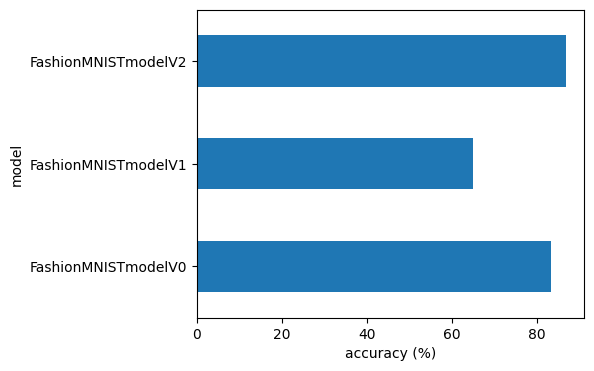

In [ ]:
# Visualize our model results
plt.figure(figsize=(5,4))
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show()

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())


  # Stack the pred_prob to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

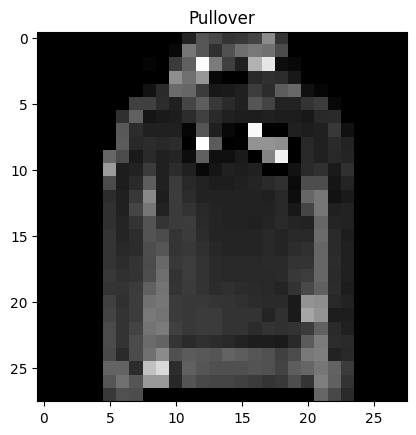

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probability
pred_probs[:2]

tensor([[9.5136e-03, 1.7265e-03, 8.4697e-01, 1.3759e-02, 8.6520e-02, 1.1635e-04,
         3.8402e-02, 2.8639e-04, 2.5115e-03, 1.9081e-04],
        [1.5777e-03, 1.6072e-04, 4.5211e-01, 6.2492e-04, 5.3453e-01, 3.0330e-06,
         1.0233e-02, 3.3182e-05, 7.0136e-04, 3.0803e-05]])

In [ ]:
test_labels

[2, 4, 6, 3, 2, 2, 0, 1, 1]

In [ ]:
# Covert preditions probabilities to labels
pred_class = pred_probs.argmax(dim=1)
pred_class

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

In [ ]:
import numpy as np

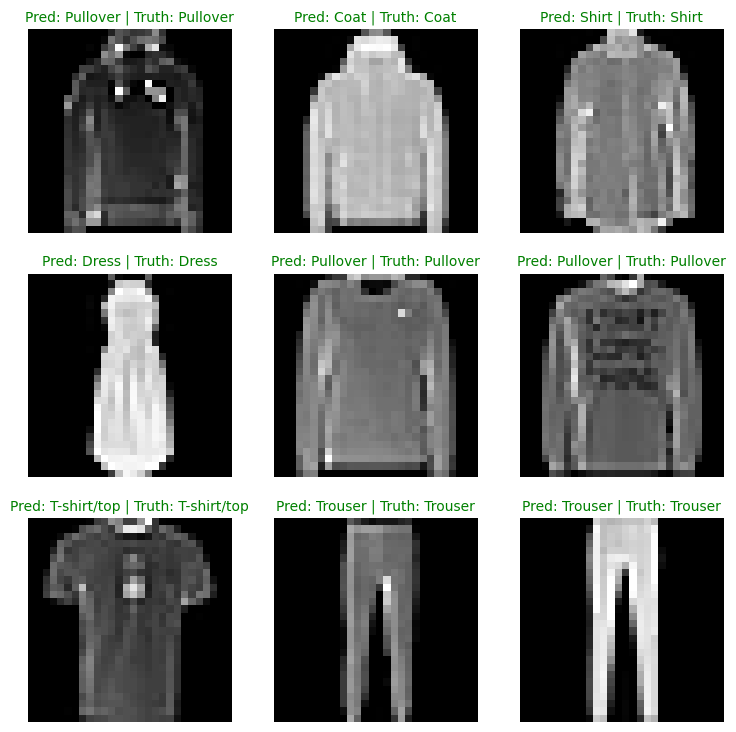

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i ,sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the predictions (in text form, e.g "Samdal")
  pred_label = class_names[pred_class[i]]
  #score = torch.nn.functional.softmax(pred_class[i])

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check the equlity between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g') # green if prediction in same as truth
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

 ## 10. Save and Load the best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("/content/drive/MyDrive/saved models")
MODEL_PATH.mkdir(parents=False,
                        exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_cnn_model_basic.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to... {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to... /content/drive/MyDrive/saved models/03_pytorch_cnn_model_basic.pth
